In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
import pandas as pd
import csv

# Interbank System
<!-- mydata = genfromtxt('interbankExposures.csv', delimiter=',')
adjacency = mydata[1:,1:]
print(adjacency) -->

In [3]:
input_data = pd.read_csv('interbankExposures.csv', header=None)
G = nx.DiGraph(input_data.values)

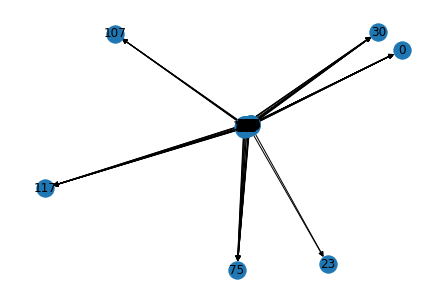

In [4]:
nx.draw(G, with_labels='True')

### Degree distribution

### Degree Centrality 

In [5]:
# nnodes = G.number_of_nodes()
# nedges = G.number_of_edges()
# Average_inDegree = sum(d for n, d in G.in_degree()) / float(nnodes)
# Average_inDegree = sum(d for n, d in G.out_degree()) / float(nnodes)
# sum_of_inDgree = sum(d for n, d in G.in_degree())
# sum_of_outDgree = sum(d for n, d in G.out_degree())
print(nx.info(G))
# print("Sum of in degree: "+str(sum_of_inDgree))
# print("Sum of out degree: "+str(sum_of_outDgree))
print ("Number of Strongly Connected Component: ", nx.number_strongly_connected_components(G))
print ("Number of Weakly Connected components: ", nx.number_weakly_connected_components(G))
print ("Gaint Connected Component: ", len(max(nx.strongly_connected_components(G), key=len)))



Name: 
Type: DiGraph
Number of nodes: 145
Number of edges: 6191
Average in degree:  42.6966
Average out degree:  42.6966
Number of Strongly Connected Component:  7
Number of Weakly Connected components:  1
Gaint Connected Component:  139


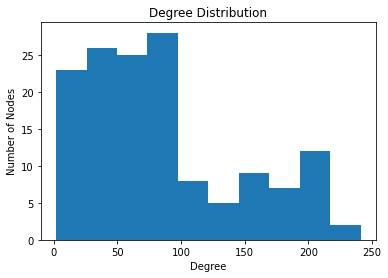

In [18]:
def degreePlot(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution')
    plt.xlabel("Degree")
    plt.ylabel('Number of Nodes')
    plt.show()
degreePlot(G)
# https://stackoverflow.com/questions/53958700/plotting-the-degree-distribution-of-a-graph-using-nx-degree-histogram

### Average Neighbour's degree

In [20]:
def avg_neigh_degree(G):
    data = {}
    for n in G.nodes():
        if G.degree(n):
            data[n] = float(sum(G.degree(i) for i in G[n]))/G.degree(n)
    return data


### Average degree connectivity 

In [28]:
sum(nx.average_degree_connectivity(G, source='in+out', target='in+out', nodes=None, weight=G.edges.data()))/float(G.number_of_nodes())


58.95862068965517

### Clustering

In [29]:
clustering = nx.clustering(G, weight=G.edges.data())
average_clustering = round((nx.average_clustering(G)),2)
print("The average clustering coefficient is: " +str(average_clustering)) 

The average clustering coefficient is: 0.73


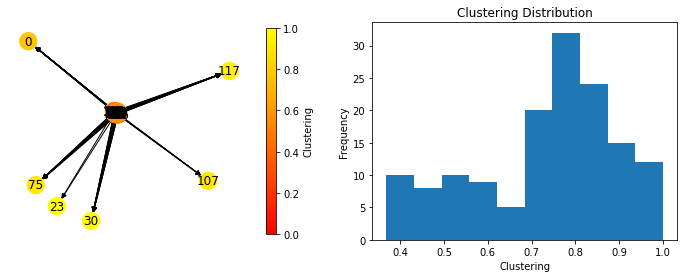

In [30]:
from matplotlib.cm import ScalarMappable
lcc = nx.clustering(G)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in G.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(G, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_title('Clustering Distribution')
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.show()

### Assortativity 

The tendency for a network's nodes to attach to others that are similar in some way. 

In [30]:
assortativity = round((nx.degree_assortativity_coefficient(G, weight=G.edges.data())),2)
print("The assortativity of the network is: " + str(assortativity))

The assortativity of the network is: -0.39


### Betweenness Centrality

In [7]:
between = nx.betweenness_centrality(G, weight=G.edges.data())
k=0
for i in range(145):
    if between[i]<=0.01:
        k+=1
m = round(((k/145)*100),2)
print("There are "+str(k)+" nodes with betweenness centrality of less than or equal to 0.01")
print("There are " + str(m)+"% of the interbank networy has betweenness centrality of of less than or equal to 0.01")


There are 121 nodes with betweenness centrality of less than or equal to 0.01
There are 83.45% of the interbank networy has betweenness centrality of of less than or equal to 0.01


Text(0, 0.5, 'Number of Nodes')

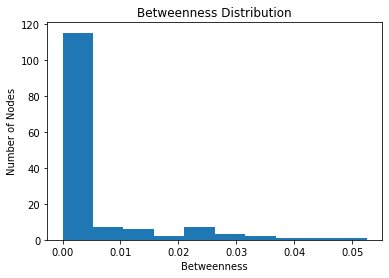

In [32]:
plt.hist(nx.betweenness_centrality(G, weight=G.edges.data()).values())
plt.title('Betweenness Distribution' )
plt.xlabel('Betweenness')
plt.ylabel('Number of Nodes')

### Average Betweenness Centrality

In [33]:
betweenness = nx.betweenness_centrality(G,weight = G.edges.data()) #,normalized = False
sum_betweenness=0
nnodes = G.number_of_nodes()
for i in range(145):
    sum_betweenness+=betweenness[i]
average_betweenness = round((sum_betweenness/nnodes),4)
print("Average Degree Centrality is: "+str(average_betweenness))

Average Degree Centrality is: 0.0048


### Closeness Centrlity 


In [35]:
nx.closeness_centrality(G)

{0: 0.5006478026533997,
 1: 0.44379194630872487,
 2: 0.46897163120567376,
 3: 0.7429775280898877,
 4: 0.4934701492537314,
 5: 0.529,
 6: 0.6645728643216081,
 7: 0.7557142857142858,
 8: 0.5145914396887159,
 9: 0.5125968992248062,
 10: 0.5125968992248062,
 11: 0.4971804511278196,
 12: 0.529,
 13: 0.6747448979591837,
 14: 0.533266129032258,
 15: 0.5227272727272727,
 16: 0.42799352750809067,
 17: 0.539795918367347,
 18: 0.5580168776371308,
 19: 0.4971804511278196,
 20: 0.667929292929293,
 21: 0.5877777777777777,
 22: 0.5166015625,
 23: 0.4442834805003679,
 24: 0.5376016260162603,
 25: 0.5510416666666667,
 26: 0.539795918367347,
 27: 0.8163580246913581,
 28: 0.5227272727272727,
 29: 0.6179906542056075,
 30: 0.4969393004115227,
 31: 0.7388268156424581,
 32: 0.5487551867219916,
 33: 0.529,
 34: 0.6888020833333334,
 35: 0.460801393728223,
 36: 0.5651709401709402,
 37: 0.5800438596491229,
 38: 0.4252411575562701,
 39: 0.7514204545454546,
 40: 0.533266129032258,
 41: 0.45603448275862074,
 42: 0.

Text(0, 0.5, 'Number of Nodes')

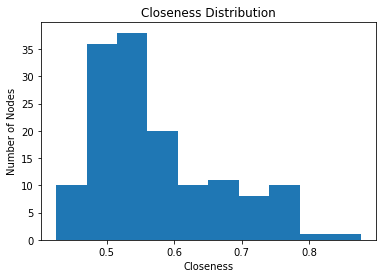

In [86]:
plt.hist(nx.closeness_centrality(G).values())
plt.title('Closeness Distribution' )
plt.xlabel('Closeness')
plt.ylabel('Number of Nodes')

### Average Closeness Centrality

In [87]:
closeness = nx.closeness_centrality(G)
sum_closeness=0
nnodes = G.number_of_nodes()
for i in range(145):
    sum_closeness+=closeness[i]
average_closeness = round((sum_closeness/nnodes),2)
print("Average Closeness Centrality is: "+str(average_closeness))

Average Closeness Centrality is: 0.57


### Eigenvector Centrality 

Text(0, 0.5, 'Number of Nodes')

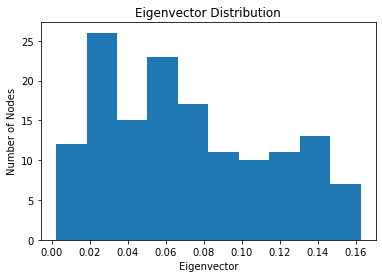

In [36]:
plt.hist(nx.eigenvector_centrality(G, weight=G.edges.data()).values())
plt.title('Eigenvector Distribution' )
plt.xlabel('Eigenvector')
plt.ylabel('Number of Nodes')

### Average Eigenvector Centrality 

In [37]:
Eigenvector = nx.eigenvector_centrality(G, weight=G.edges.data())
sum_eigenvector=0
nnodes = G.number_of_nodes()
for i in range(145):
    sum_eigenvector+=Eigenvector[i]
average_eigenvector = round((sum_eigenvector/nnodes),2)
print("Average Eigenvector Centrality is: "+str(average_eigenvector))

Average Eigenvector Centrality is: 0.07
